<a href="https://colab.research.google.com/github/Vaibhavipowar2023/C-Programming/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-preprocessing


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Import libraries
import tensorflow as tf
import keras
from keras_preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os


In [ ]:
#check the version
keras.__version__

'3.4.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data_path = "/content/drive/MyDrive/Datasets/emotion detection/train"
test_data_path = "/content/drive/MyDrive/Datasets/emotion detection/test"

In [ ]:

def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [ ]:

train = pd.DataFrame()
train['image'], train['label'] = createdataframe(train_data_path)

surprise completed
fear completed
neutral completed
angry completed
happy completed
sad completed
disgust completed


In [ ]:

print(train)

                                                   image     label
0      /content/drive/MyDrive/Datasets/emotion detect...  surprise
1      /content/drive/MyDrive/Datasets/emotion detect...  surprise
2      /content/drive/MyDrive/Datasets/emotion detect...  surprise
3      /content/drive/MyDrive/Datasets/emotion detect...  surprise
4      /content/drive/MyDrive/Datasets/emotion detect...  surprise
...                                                  ...       ...
10585  /content/drive/MyDrive/Datasets/emotion detect...       sad
10586  /content/drive/MyDrive/Datasets/emotion detect...       sad
10587  /content/drive/MyDrive/Datasets/emotion detect...       sad
10588  /content/drive/MyDrive/Datasets/emotion detect...       sad
10589  /content/drive/MyDrive/Datasets/emotion detect...       sad

[10590 rows x 2 columns]


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(test_data_path)

neutral completed
disgust completed
fear completed
angry completed
happy completed
sad completed
surprise completed


In [ ]:
print(test)

                                                  image     label
0     /content/drive/MyDrive/Datasets/emotion detect...   neutral
1     /content/drive/MyDrive/Datasets/emotion detect...   neutral
2     /content/drive/MyDrive/Datasets/emotion detect...   neutral
3     /content/drive/MyDrive/Datasets/emotion detect...   neutral
4     /content/drive/MyDrive/Datasets/emotion detect...   neutral
...                                                 ...       ...
7173  /content/drive/MyDrive/Datasets/emotion detect...  surprise
7174  /content/drive/MyDrive/Datasets/emotion detect...  surprise
7175  /content/drive/MyDrive/Datasets/emotion detect...  surprise
7176  /content/drive/MyDrive/Datasets/emotion detect...  surprise
7177  /content/drive/MyDrive/Datasets/emotion detect...  surprise

[7178 rows x 2 columns]


In [ ]:
print(test['image'])

0       /content/drive/MyDrive/Datasets/emotion detect...
1       /content/drive/MyDrive/Datasets/emotion detect...
2       /content/drive/MyDrive/Datasets/emotion detect...
3       /content/drive/MyDrive/Datasets/emotion detect...
4       /content/drive/MyDrive/Datasets/emotion detect...
                              ...                        
7173    /content/drive/MyDrive/Datasets/emotion detect...
7174    /content/drive/MyDrive/Datasets/emotion detect...
7175    /content/drive/MyDrive/Datasets/emotion detect...
7176    /content/drive/MyDrive/Datasets/emotion detect...
7177    /content/drive/MyDrive/Datasets/emotion detect...
Name: image, Length: 7178, dtype: object


In [ ]:
from tqdm.notebook import tqdm

In [ ]:

# Extract features
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/10590 [00:00<?, ?it/s]

In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [ ]:

# Normalize the data
x_train = train_features / 255.0
x_test = test_features / 255.0


In [ ]:
# Encode the labels using pd.Categorical
categories = ['happy', 'sad', 'angry', 'surprise', 'neutral', 'disgust']
y_train_encoded = pd.Categorical(train['label'], categories=categories).codes
y_test_encoded = pd.Categorical(test['label'], categories=categories).codes


In [ ]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train_encoded, num_classes=len(categories))
y_test = to_categorical(y_test_encoded, num_classes=len(categories))

In [ ]:
# Define the model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(categories), activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Create an instance of the ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
#Fit the generator on the training data
datagen.fit(x_train)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# Train the model using the data generator
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


331/331 ━━━━━━━━━━━━━━━━━━━━ 56s 161ms/step - accuracy: 0.4161 - loss: 1.1615 - val_accuracy: 0.2086 - val_loss: 6.0874
Epoch 2/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.5204 - loss: 1.0043 - val_accuracy: 0.2048 - val_loss: 5.7517
Epoch 3/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 55s 165ms/step - accuracy: 0.5451 - loss: 0.9655 - val_accuracy: 0.2183 - val_loss: 7.8752
Epoch 4/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 51s 155ms/step - accuracy: 0.5958 - loss: 0.8952 - val_accuracy: 0.2576 - val_loss: 7.5160
Epoch 5/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 55s 165ms/step - accuracy: 0.6174 - loss: 0.8457 - val_accuracy: 0.2615 - val_loss: 7.4957
Epoch 6/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 52s 158ms/step - accuracy: 0.6320 - loss: 0.8156 - val_accuracy: 0.2986 - val_loss: 7.6909
Epoch 7/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 79s 150ms/step - accuracy: 0.6537 - loss: 0.7692 - val_accuracy: 0.2871 - val_loss: 7.7831
Epoch 8/20
331/331 ━━━━━━━━━━━━━━━━━━━━ 50s 151ms/step - accuracy: 0.6707 - loss: 0.7329 - val

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')

225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.2547 - loss: 10.2325
Test accuracy: 0.32


Prediction

In [ ]:
# Prediction function
labels = ['happy', 'sad', 'angry', 'surprise', 'neutral', 'disgust']


In [ ]:
def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Model prediction is sad


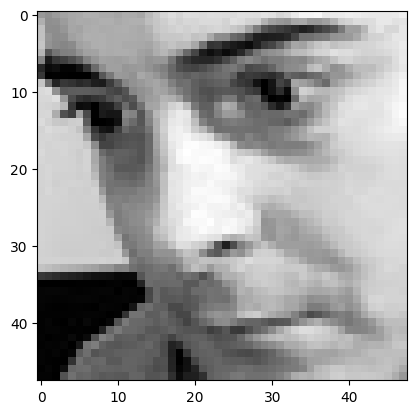

In [ ]:
# Display another image
image = '/content/drive/MyDrive/Datasets/emotion detection/train/angry/Training_175233.jpg'
img = ef(image)
pred = model.predict(img)
pred_label = labels[pred.argmax()]
print("Model prediction is", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  surprise


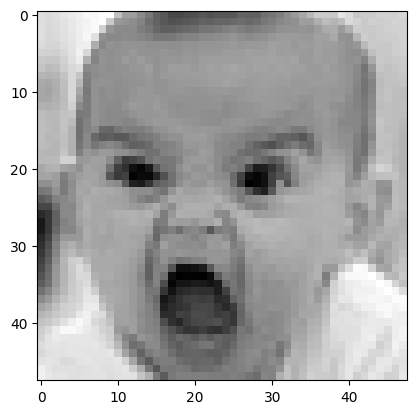

In [ ]:
image = '/content/drive/MyDrive/Datasets/emotion detection/train/angry/Training_143373.jpg'
img = ef(image)
pred = model.predict(img)
pred_label = labels[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


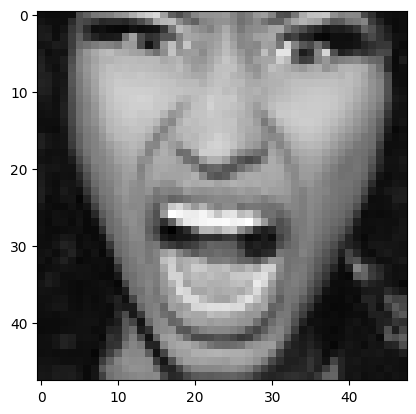

In [ ]:
image = '/content/drive/MyDrive/Datasets/emotion detection/test/angry/PrivateTest_56780735.jpg'
img = ef(image)
pred = model.predict(img)
pred_label = labels[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')